In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
import seaborn as sns

df = pd.read_csv("PROJECT REGRATION.csv")

In [2]:
df

,ID,Amount.Requested,Amount.Funded.By.Investors,Interest.Rate,Loan.Length,Loan.Purpose,Debt.To.Income.Ratio,Home.Ownership,Monthly.Income,Open.CREDIT.Lines,Revolving.CREDIT.Balance,Inquiries.in.the.Last.6.Months,Employment.Length
0,81174.0,20000,20000.00,0.09,36 months,debt_consolidation,0.15,MORTGAGE,6541.67,14,14272,2,1 year
1,99592.0,19200,19200.00,0.12,36 months,debt_consolidation,0.28,MORTGAGE,4583.33,12,11140,1,2 years
2,80059.0,35000,35000.00,0.22,60 months,debt_consolidation,0.24,MORTGAGE,11500.00,14,21977,1,2 years
3,15825.0,10000,9975.00,0.10,36 months,debt_consolidation,0.14,MORTGAGE,3833.33,10,9346,0,5 years
4,33182.0,12000,12000.00,0.12,36 months,credit_card,0.19,RENT,3195.00,11,14469,0,9 years
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2495,23735.0,30000,29950.00,0.17,60 months,debt_consolidation,0.19,MORTGAGE,9250.00,15,45880,1,8 years
2496,65882.0,16000,16000.00,0.14,60 months,home_improvement,0.22,OWN,8903.25,18,18898,1,10+ years
2497,55610.0,10000,10000.00,0.14,36 months,debt_consolidation,0.05,MORTGAGE,2166.67,4,4544,0,10+ years
2498,38576.0,6000,6000.00,0.12,36 months,major_purchase,0.17,RENT,3500.00,8,1275,0,5 years


In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
df.isna().sum()

ID                                 1
Amount.Requested                   0
Amount.Funded.By.Investors         0
Interest.Rate                      0
Loan.Length                        1
Loan.Purpose                       1
Debt.To.Income.Ratio               0
Home.Ownership                     1
Monthly.Income                     0
Open.CREDIT.Lines                  0
Revolving.CREDIT.Balance           0
Inquiries.in.the.Last.6.Months     0
Employment.Length                 78
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 13 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   ID                              2499 non-null   float64
 1   Amount.Requested                2500 non-null   int64  
 2   Amount.Funded.By.Investors      2500 non-null   float64
 3   Interest.Rate                   2500 non-null   float64
 4   Loan.Length                     2499 non-null   object 
 5   Loan.Purpose                    2499 non-null   object 
 6   Debt.To.Income.Ratio            2500 non-null   float64
 7   Home.Ownership                  2499 non-null   object 
 8   Monthly.Income                  2500 non-null   float64
 9   Open.CREDIT.Lines               2500 non-null   int64  
 10  Revolving.CREDIT.Balance        2500 non-null   int64  
 11  Inquiries.in.the.Last.6.Months  2500 non-null   int64  
 12  Employment.Length               24

In [6]:
df.dropna(subset=['ID'],inplace = True)
df

,ID,Amount.Requested,Amount.Funded.By.Investors,Interest.Rate,Loan.Length,Loan.Purpose,Debt.To.Income.Ratio,Home.Ownership,Monthly.Income,Open.CREDIT.Lines,Revolving.CREDIT.Balance,Inquiries.in.the.Last.6.Months,Employment.Length
0,81174.0,20000,20000.00,0.09,36 months,debt_consolidation,0.15,MORTGAGE,6541.67,14,14272,2,1 year
1,99592.0,19200,19200.00,0.12,36 months,debt_consolidation,0.28,MORTGAGE,4583.33,12,11140,1,2 years
2,80059.0,35000,35000.00,0.22,60 months,debt_consolidation,0.24,MORTGAGE,11500.00,14,21977,1,2 years
3,15825.0,10000,9975.00,0.10,36 months,debt_consolidation,0.14,MORTGAGE,3833.33,10,9346,0,5 years
4,33182.0,12000,12000.00,0.12,36 months,credit_card,0.19,RENT,3195.00,11,14469,0,9 years
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2495,23735.0,30000,29950.00,0.17,60 months,debt_consolidation,0.19,MORTGAGE,9250.00,15,45880,1,8 years
2496,65882.0,16000,16000.00,0.14,60 months,home_improvement,0.22,OWN,8903.25,18,18898,1,10+ years
2497,55610.0,10000,10000.00,0.14,36 months,debt_consolidation,0.05,MORTGAGE,2166.67,4,4544,0,10+ years
2498,38576.0,6000,6000.00,0.12,36 months,major_purchase,0.17,RENT,3500.00,8,1275,0,5 years


In [7]:
df.isna().sum()

ID                                 0
Amount.Requested                   0
Amount.Funded.By.Investors         0
Interest.Rate                      0
Loan.Length                        1
Loan.Purpose                       1
Debt.To.Income.Ratio               0
Home.Ownership                     1
Monthly.Income                     0
Open.CREDIT.Lines                  0
Revolving.CREDIT.Balance           0
Inquiries.in.the.Last.6.Months     0
Employment.Length                 78
dtype: int64

In [8]:
df.dropna(subset=['Loan.Length'],inplace=True)

In [9]:
df

,ID,Amount.Requested,Amount.Funded.By.Investors,Interest.Rate,Loan.Length,Loan.Purpose,Debt.To.Income.Ratio,Home.Ownership,Monthly.Income,Open.CREDIT.Lines,Revolving.CREDIT.Balance,Inquiries.in.the.Last.6.Months,Employment.Length
0,81174.0,20000,20000.00,0.09,36 months,debt_consolidation,0.15,MORTGAGE,6541.67,14,14272,2,1 year
1,99592.0,19200,19200.00,0.12,36 months,debt_consolidation,0.28,MORTGAGE,4583.33,12,11140,1,2 years
2,80059.0,35000,35000.00,0.22,60 months,debt_consolidation,0.24,MORTGAGE,11500.00,14,21977,1,2 years
3,15825.0,10000,9975.00,0.10,36 months,debt_consolidation,0.14,MORTGAGE,3833.33,10,9346,0,5 years
4,33182.0,12000,12000.00,0.12,36 months,credit_card,0.19,RENT,3195.00,11,14469,0,9 years
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2495,23735.0,30000,29950.00,0.17,60 months,debt_consolidation,0.19,MORTGAGE,9250.00,15,45880,1,8 years
2496,65882.0,16000,16000.00,0.14,60 months,home_improvement,0.22,OWN,8903.25,18,18898,1,10+ years
2497,55610.0,10000,10000.00,0.14,36 months,debt_consolidation,0.05,MORTGAGE,2166.67,4,4544,0,10+ years
2498,38576.0,6000,6000.00,0.12,36 months,major_purchase,0.17,RENT,3500.00,8,1275,0,5 years


In [10]:
df.dropna(subset=['Loan.Purpose'],inplace=True)

In [11]:
df

,ID,Amount.Requested,Amount.Funded.By.Investors,Interest.Rate,Loan.Length,Loan.Purpose,Debt.To.Income.Ratio,Home.Ownership,Monthly.Income,Open.CREDIT.Lines,Revolving.CREDIT.Balance,Inquiries.in.the.Last.6.Months,Employment.Length
0,81174.0,20000,20000.00,0.09,36 months,debt_consolidation,0.15,MORTGAGE,6541.67,14,14272,2,1 year
1,99592.0,19200,19200.00,0.12,36 months,debt_consolidation,0.28,MORTGAGE,4583.33,12,11140,1,2 years
2,80059.0,35000,35000.00,0.22,60 months,debt_consolidation,0.24,MORTGAGE,11500.00,14,21977,1,2 years
3,15825.0,10000,9975.00,0.10,36 months,debt_consolidation,0.14,MORTGAGE,3833.33,10,9346,0,5 years
4,33182.0,12000,12000.00,0.12,36 months,credit_card,0.19,RENT,3195.00,11,14469,0,9 years
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2495,23735.0,30000,29950.00,0.17,60 months,debt_consolidation,0.19,MORTGAGE,9250.00,15,45880,1,8 years
2496,65882.0,16000,16000.00,0.14,60 months,home_improvement,0.22,OWN,8903.25,18,18898,1,10+ years
2497,55610.0,10000,10000.00,0.14,36 months,debt_consolidation,0.05,MORTGAGE,2166.67,4,4544,0,10+ years
2498,38576.0,6000,6000.00,0.12,36 months,major_purchase,0.17,RENT,3500.00,8,1275,0,5 years


In [12]:
df.dropna(subset=['Home.Ownership'],inplace = True)

In [13]:
df

,ID,Amount.Requested,Amount.Funded.By.Investors,Interest.Rate,Loan.Length,Loan.Purpose,Debt.To.Income.Ratio,Home.Ownership,Monthly.Income,Open.CREDIT.Lines,Revolving.CREDIT.Balance,Inquiries.in.the.Last.6.Months,Employment.Length
0,81174.0,20000,20000.00,0.09,36 months,debt_consolidation,0.15,MORTGAGE,6541.67,14,14272,2,1 year
1,99592.0,19200,19200.00,0.12,36 months,debt_consolidation,0.28,MORTGAGE,4583.33,12,11140,1,2 years
2,80059.0,35000,35000.00,0.22,60 months,debt_consolidation,0.24,MORTGAGE,11500.00,14,21977,1,2 years
3,15825.0,10000,9975.00,0.10,36 months,debt_consolidation,0.14,MORTGAGE,3833.33,10,9346,0,5 years
4,33182.0,12000,12000.00,0.12,36 months,credit_card,0.19,RENT,3195.00,11,14469,0,9 years
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2495,23735.0,30000,29950.00,0.17,60 months,debt_consolidation,0.19,MORTGAGE,9250.00,15,45880,1,8 years
2496,65882.0,16000,16000.00,0.14,60 months,home_improvement,0.22,OWN,8903.25,18,18898,1,10+ years
2497,55610.0,10000,10000.00,0.14,36 months,debt_consolidation,0.05,MORTGAGE,2166.67,4,4544,0,10+ years
2498,38576.0,6000,6000.00,0.12,36 months,major_purchase,0.17,RENT,3500.00,8,1275,0,5 years


In [14]:
df.isna().sum()

ID                                 0
Amount.Requested                   0
Amount.Funded.By.Investors         0
Interest.Rate                      0
Loan.Length                        0
Loan.Purpose                       0
Debt.To.Income.Ratio               0
Home.Ownership                     0
Monthly.Income                     0
Open.CREDIT.Lines                  0
Revolving.CREDIT.Balance           0
Inquiries.in.the.Last.6.Months     0
Employment.Length                 78
dtype: int64

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2496 entries, 0 to 2499
Data columns (total 13 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   ID                              2496 non-null   float64
 1   Amount.Requested                2496 non-null   int64  
 2   Amount.Funded.By.Investors      2496 non-null   float64
 3   Interest.Rate                   2496 non-null   float64
 4   Loan.Length                     2496 non-null   object 
 5   Loan.Purpose                    2496 non-null   object 
 6   Debt.To.Income.Ratio            2496 non-null   float64
 7   Home.Ownership                  2496 non-null   object 
 8   Monthly.Income                  2496 non-null   float64
 9   Open.CREDIT.Lines               2496 non-null   int64  
 10  Revolving.CREDIT.Balance        2496 non-null   int64  
 11  Inquiries.in.the.Last.6.Months  2496 non-null   int64  
 12  Employment.Length               24

In [16]:
df.tail(15)

,ID,Amount.Requested,Amount.Funded.By.Investors,Interest.Rate,Loan.Length,Loan.Purpose,Debt.To.Income.Ratio,Home.Ownership,Monthly.Income,Open.CREDIT.Lines,Revolving.CREDIT.Balance,Inquiries.in.the.Last.6.Months,Employment.Length
2485,13070.0,25000,24950.00,0.11,36 months,debt_consolidation,0.20,MORTGAGE,7083.33,10,25429,0,6 years
2486,45836.0,7000,7000.00,0.17,36 months,other,0.18,OWN,2464.37,9,7089,0,3 years
2487,52330.0,15000,15000.00,0.20,36 months,wedding,0.18,RENT,8000.00,6,45976,1,2 years
2488,48243.0,17000,17000.00,0.16,36 months,debt_consolidation,0.17,RENT,3833.33,6,15484,1,6 years
2489,63256.0,19075,19075.00,0.19,36 months,debt_consolidation,0.15,RENT,5166.67,17,13749,3,10+ years
2490,42124.0,10000,10000.00,0.12,36 months,debt_consolidation,0.08,RENT,4500.00,8,8404,1,3 years
2491,78043.0,8475,8475.00,0.08,36 months,debt_consolidation,0.16,RENT,3983.33,9,6882,0,NaN
2492,925.0,6400,6350.00,0.10,36 months,debt_consolidation,0.08,MORTGAGE,5166.67,5,5815,2,10+ years
2493,74047.0,30000,30000.00,0.23,60 months,other,0.12,MORTGAGE,7083.33,16,17969,1,10+ years
2494,49957.0,24000,23975.00,0.15,36 months,debt_consolidation,0.15,MORTGAGE,6666.67,13,17521,0,5 years


In [17]:
df["Employment.Length"].value_counts()

10+ years    652
1 year       427
2 years      243
3 years      235
5 years      202
4 years      190
6 years      162
7 years      127
8 years      108
9 years       72
Name: Employment.Length, dtype: int64

In [18]:
col_to_fill_zero = ["Employment.Length"]
df[col_to_fill_zero]=df[col_to_fill_zero].fillna(0)

In [19]:
df

,ID,Amount.Requested,Amount.Funded.By.Investors,Interest.Rate,Loan.Length,Loan.Purpose,Debt.To.Income.Ratio,Home.Ownership,Monthly.Income,Open.CREDIT.Lines,Revolving.CREDIT.Balance,Inquiries.in.the.Last.6.Months,Employment.Length
0,81174.0,20000,20000.00,0.09,36 months,debt_consolidation,0.15,MORTGAGE,6541.67,14,14272,2,1 year
1,99592.0,19200,19200.00,0.12,36 months,debt_consolidation,0.28,MORTGAGE,4583.33,12,11140,1,2 years
2,80059.0,35000,35000.00,0.22,60 months,debt_consolidation,0.24,MORTGAGE,11500.00,14,21977,1,2 years
3,15825.0,10000,9975.00,0.10,36 months,debt_consolidation,0.14,MORTGAGE,3833.33,10,9346,0,5 years
4,33182.0,12000,12000.00,0.12,36 months,credit_card,0.19,RENT,3195.00,11,14469,0,9 years
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2495,23735.0,30000,29950.00,0.17,60 months,debt_consolidation,0.19,MORTGAGE,9250.00,15,45880,1,8 years
2496,65882.0,16000,16000.00,0.14,60 months,home_improvement,0.22,OWN,8903.25,18,18898,1,10+ years
2497,55610.0,10000,10000.00,0.14,36 months,debt_consolidation,0.05,MORTGAGE,2166.67,4,4544,0,10+ years
2498,38576.0,6000,6000.00,0.12,36 months,major_purchase,0.17,RENT,3500.00,8,1275,0,5 years


In [20]:
df.tail(15)

,ID,Amount.Requested,Amount.Funded.By.Investors,Interest.Rate,Loan.Length,Loan.Purpose,Debt.To.Income.Ratio,Home.Ownership,Monthly.Income,Open.CREDIT.Lines,Revolving.CREDIT.Balance,Inquiries.in.the.Last.6.Months,Employment.Length
2485,13070.0,25000,24950.00,0.11,36 months,debt_consolidation,0.20,MORTGAGE,7083.33,10,25429,0,6 years
2486,45836.0,7000,7000.00,0.17,36 months,other,0.18,OWN,2464.37,9,7089,0,3 years
2487,52330.0,15000,15000.00,0.20,36 months,wedding,0.18,RENT,8000.00,6,45976,1,2 years
2488,48243.0,17000,17000.00,0.16,36 months,debt_consolidation,0.17,RENT,3833.33,6,15484,1,6 years
2489,63256.0,19075,19075.00,0.19,36 months,debt_consolidation,0.15,RENT,5166.67,17,13749,3,10+ years
2490,42124.0,10000,10000.00,0.12,36 months,debt_consolidation,0.08,RENT,4500.00,8,8404,1,3 years
2491,78043.0,8475,8475.00,0.08,36 months,debt_consolidation,0.16,RENT,3983.33,9,6882,0,0
2492,925.0,6400,6350.00,0.10,36 months,debt_consolidation,0.08,MORTGAGE,5166.67,5,5815,2,10+ years
2493,74047.0,30000,30000.00,0.23,60 months,other,0.12,MORTGAGE,7083.33,16,17969,1,10+ years
2494,49957.0,24000,23975.00,0.15,36 months,debt_consolidation,0.15,MORTGAGE,6666.67,13,17521,0,5 years


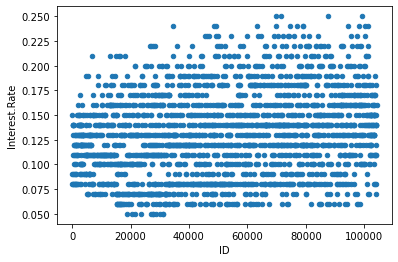

In [21]:
df.plot(
   x='ID', 
   y='Interest.Rate', 
   kind='scatter'
)

plt.show()

In [22]:
df = pd.get_dummies(df, drop_first=True)
df.head()

,ID,Amount.Requested,Amount.Funded.By.Investors,Interest.Rate,Debt.To.Income.Ratio,Monthly.Income,Open.CREDIT.Lines,Revolving.CREDIT.Balance,Inquiries.in.the.Last.6.Months,Loan.Length_36 months,...,Employment.Length_1 year,Employment.Length_10+ years,Employment.Length_2 years,Employment.Length_3 years,Employment.Length_4 years,Employment.Length_5 years,Employment.Length_6 years,Employment.Length_7 years,Employment.Length_8 years,Employment.Length_9 years
0,81174.0,20000,20000.0,0.09,0.15,6541.67,14,14272,2,1,...,1,0,0,0,0,0,0,0,0,0
1,99592.0,19200,19200.0,0.12,0.28,4583.33,12,11140,1,1,...,0,0,1,0,0,0,0,0,0,0
2,80059.0,35000,35000.0,0.22,0.24,11500.00,14,21977,1,0,...,0,0,1,0,0,0,0,0,0,0
3,15825.0,10000,9975.0,0.10,0.14,3833.33,10,9346,0,1,...,0,0,0,0,0,1,0,0,0,0
4,33182.0,12000,12000.0,0.12,0.19,3195.00,11,14469,0,1,...,0,0,0,0,0,0,0,0,0,1


In [23]:
x = df.drop('Interest.Rate', axis=1)

In [24]:
y=df['Interest.Rate']

In [25]:
from sklearn.model_selection import train_test_split
train_X, test_X, train_Y,test_Y = train_test_split(x,y , test_size = 0.3,random_state=2)

In [26]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()

In [27]:
reg.fit(train_X , train_Y)

LinearRegression()

In [28]:
reg.score(test_X,test_Y)

0.2881329845752072

In [29]:
from sklearn.linear_model import Ridge,Lasso

In [30]:
rd = Ridge()

rd.fit(train_X,train_Y)

rd.score(test_X,test_Y)


0.28868310560491917

In [31]:
ls = Lasso()

ls.fit(train_X,train_Y)

ls.score(test_X,test_Y)


0.1625106275383873

In [32]:
rd2 = Ridge(alpha=2)

rd2.fit(train_X,train_Y)

rd2.score(test_X,test_Y)


0.2887339052443555

In [33]:
ls2 = Lasso(alpha=2)

ls2.fit(train_X,train_Y)

ls2.score(test_X,test_Y)


0.16193739198647106

In [34]:
pred_Y=reg.predict(test_X)
print(pred_Y)

[0.12552248 0.1073552  0.11812003 0.10727827 0.10670678 0.11700107
 0.12817534 0.11311954 0.10188553 0.16065728 0.12578614 0.13643041
 0.13040952 0.14099253 0.12277803 0.12386394 0.10876079 0.14790357
 0.14284452 0.13508791 0.13140583 0.16578781 0.11950188 0.11270171
 0.12753037 0.13988311 0.14775682 0.18582932 0.11916326 0.15196301
 0.11818073 0.13294061 0.15474854 0.1704672  0.12846731 0.16229041
 0.10268835 0.09654612 0.08741003 0.09698533 0.15652301 0.12347579
 0.12336856 0.12497016 0.15190352 0.10592509 0.12144002 0.15553463
 0.12217685 0.16149631 0.13792884 0.12525823 0.12320917 0.17649809
 0.11298276 0.10993585 0.12764293 0.10400447 0.12241421 0.10649163
 0.12262971 0.11386179 0.12031778 0.13346606 0.11270199 0.13750232
 0.11942325 0.10239539 0.12631932 0.16541619 0.10340631 0.11091949
 0.11862896 0.13271416 0.14747699 0.16824506 0.18251696 0.18814409
 0.11370842 0.12330006 0.14137899 0.16145807 0.11562003 0.10313373
 0.12960716 0.17689928 0.14397626 0.12940506 0.0831273  0.1349

In [35]:
from sklearn.metrics import r2_score
r2_score(test_Y,pred_Y)

0.2881329845752072

In [36]:
pred_Y_df=pd.DataFrame({'Actual Value':test_Y,'Predicted value':pred_Y,'Difference':test_Y-pred_Y})
pred_Y_df[0:20]

,Actual Value,Predicted value,Difference
1310,0.18,0.125522,0.054478
2461,0.08,0.107355,-0.027355
1705,0.15,0.118120,0.031880
1937,0.10,0.107278,-0.007278
2125,0.13,0.106707,0.023293
1173,0.11,0.117001,-0.007001
1201,0.08,0.128175,-0.048175
2024,0.11,0.113120,-0.003120
1318,0.11,0.101886,0.008114
2165,0.12,0.160657,-0.040657


In [37]:
x.head()

,ID,Amount.Requested,Amount.Funded.By.Investors,Debt.To.Income.Ratio,Monthly.Income,Open.CREDIT.Lines,Revolving.CREDIT.Balance,Inquiries.in.the.Last.6.Months,Loan.Length_36 months,Loan.Length_60 months,...,Employment.Length_1 year,Employment.Length_10+ years,Employment.Length_2 years,Employment.Length_3 years,Employment.Length_4 years,Employment.Length_5 years,Employment.Length_6 years,Employment.Length_7 years,Employment.Length_8 years,Employment.Length_9 years
0,81174.0,20000,20000.0,0.15,6541.67,14,14272,2,1,0,...,1,0,0,0,0,0,0,0,0,0
1,99592.0,19200,19200.0,0.28,4583.33,12,11140,1,1,0,...,0,0,1,0,0,0,0,0,0,0
2,80059.0,35000,35000.0,0.24,11500.00,14,21977,1,0,1,...,0,0,1,0,0,0,0,0,0,0
3,15825.0,10000,9975.0,0.14,3833.33,10,9346,0,1,0,...,0,0,0,0,0,1,0,0,0,0
4,33182.0,12000,12000.0,0.19,3195.00,11,14469,0,1,0,...,0,0,0,0,0,0,0,0,0,1


Text(0.5, 1.0, 'Actual vs. Predicted')

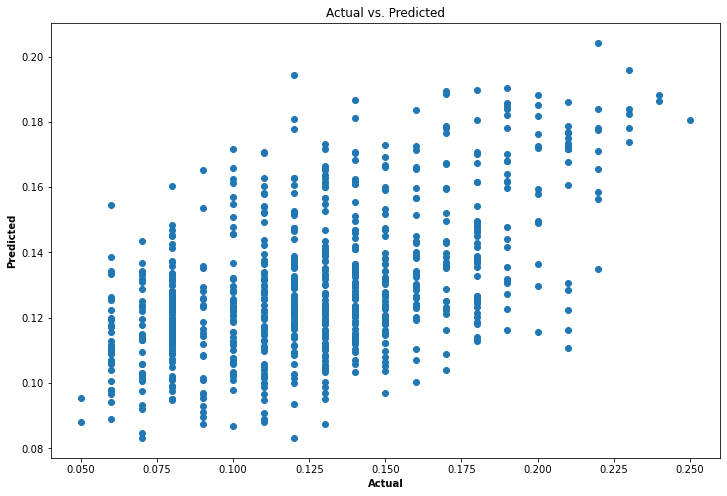

In [38]:
plt.figure(figsize=(12,8))
plt.scatter(test_Y,pred_Y)
plt.xlabel('Actual',fontsize=10,fontweight='bold')
plt.ylabel('Predicted',fontsize=10,fontweight='bold')

plt.title('Actual vs. Predicted')